In [1]:
# Imported libraries

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import emoji
%matplotlib inline
import datetime 
import collections
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# The text file is gotten from an android so the code will be different from that of an IOS
# Read each line in a txt file
# Clean the Data and prepare it 
path = 'whatsappJulyClass.txt'

with open(path, 'r', encoding = 'utf-8') as f:
    new_lines = []
    prev_line = ''
    line = f.readline()
    while line:
        if "]" not in line or ':' not in line:
            prev_line += line
        else:
            new_lines.append(prev_line)
            prev_line = line
        line = f.readline()
    new_lines.append(prev_line)
    
# create empty list
date = []
messages_sent = []
authors = []

# Iterate through the list
for i, lines in enumerate((new_lines)):
    # Skip the first index
    if i == 0:
        continue
        
    else:
        splits = lines.split("]")
        time = splits[0]
        author, messages = splits[1].split(":")[0], splits[1].split(":")
        if len(messages) >1:
            messages = " ".join(messages[1:])
        
    date.append(time)
    messages_sent.append(messages)
    authors.append(author)

In [3]:
date
len(date)
len(authors)
len(messages_sent)

33340

In [4]:
# Create a dataframe

df = pd.DataFrame({'Authors':authors, 'date':date, 'messages_sent': messages_sent})
df.head(3)

,Authors,date,messages_sent
0,July 22 IT Class 1,"[06/06/2022, 21:09:19",‎Messages and calls are end-to-end encrypted....
1,Ekwutosi Lemonade Facebook,"[06/06/2022, 21:09:19",‎Ekwutosi Lemonade Facebook created this group\n
2,July 22 IT Class 1,"[28/06/2022, 10:55:23",‎You joined using this group's invite link\n


In [5]:
# Clean the date column
df['date'] = df['date'].str.replace('[^\d/:\s]','', regex=True)
#df.to_csv('whatsApp.csv', index= False)

In [6]:
#df = pd.read_csv("whatsApp.csv")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33340 entries, 0 to 33339
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Authors        33340 non-null  object
 1   date           33340 non-null  object
 2   messages_sent  33340 non-null  object
dtypes: object(3)
memory usage: 781.5+ KB


In [7]:
# Convert to the date to a date_time column
df['date'] = pd.to_datetime(df['date'], errors = 'coerce', format='%d/%m/%Y %H:%M:%S')

df.dropna(inplace = True)


In [8]:
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 33331 entries, 0 to 33339
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Authors        33331 non-null  object        
 1   date           33331 non-null  datetime64[ns]
 2   messages_sent  33331 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.0+ MB


In [9]:
# Add two columns to the data frame
df['days of the week'] = df.date.dt.day_name()
df['hours_of_day'] = df.date.dt.hour

In [28]:
df.tail(5)
df.columns

Index(['Authors', 'date', 'messages_sent', 'days of the week', 'hours_of_day',
       'emoji_diction', 'count_of_emojis_per message', 'types_of_emoji',
       'url_count'],
      dtype='object')

In [11]:
#def extract_emojis():
    #return ''.join(c for c in s if c in emoji.emoji_list['en'])
    #return emoji.emoji_list
# Create a column that counts up the different types of emojis in each user meassge
df['emoji_diction'] = df['messages_sent'].apply(lambda messages: collections.Counter([match["emoji"] for word in messages for match in emoji.emoji_list(word)]))


In [12]:
df['count_of_emojis_per message'] = df['emoji_diction'].apply(lambda emojis : sum(emojis.values()))

def unpack_emojis(message):
    message = list(message)
    list_of_names = []
    for emo in message:
        emo = emoji.demojize(emo).split(':')[1]
        list_of_names.append(emo)
    return ", ".join(list_of_names)
df['types_of_emoji'] = df['emoji_diction'].apply(lambda emojis : emojis.keys()).apply(unpack_emojis)    

In [22]:
#df.tail()

In [14]:
# get the urls in each message if any

pattern = r'(https[:]*[//]*[^\s]*)'

text = 'https://twitter.com/DigitallWitch/status/1543217141549252612 go daddy https://twitter.com/DigitallWitch/status/1542900846022762496 and also check this out https://www.linkedin.com/posts/digital-witch-support-community_techcommunity-tech-techstartup-activity-6947612525639139328-yC28?utm_source=linkedin_share&utm_medium=ios_app'

re.findall(pattern, text)



['https://twitter.com/DigitallWitch/status/1543217141549252612',
 'https://twitter.com/DigitallWitch/status/1542900846022762496',
 'https://www.linkedin.com/posts/digital-witch-support-community_techcommunity-tech-techstartup-activity-6947612525639139328-yC28?utm_source=linkedin_share&utm_medium=ios_app']

In [15]:
df['url_count'] = df['messages_sent'].apply(lambda message: len(re.findall(pattern, message)))


<AxesSubplot:>

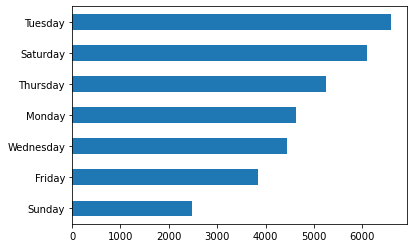

In [16]:
df['days of the week'].value_counts().sort_values(ascending = True).plot(kind= 'barh')

<AxesSubplot:>

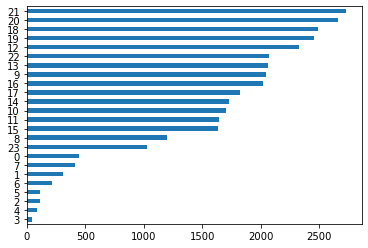

In [16]:
df['hours_of_day'].value_counts().sort_values(ascending = True).plot(kind = 'barh')

In [17]:
df['Authors'].nunique()

452

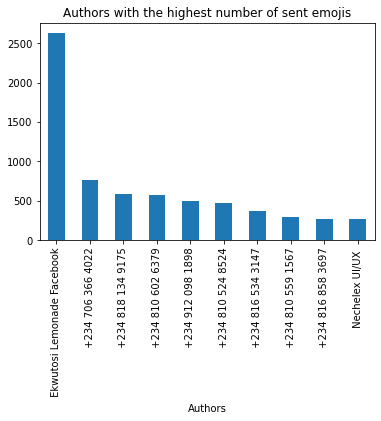

In [18]:
df.groupby(by ='Authors')['count_of_emojis_per message'].sum().nlargest(10).plot(kind = 'bar')
plt.title('Authors with the highest number of sent emojis')
plt.show()

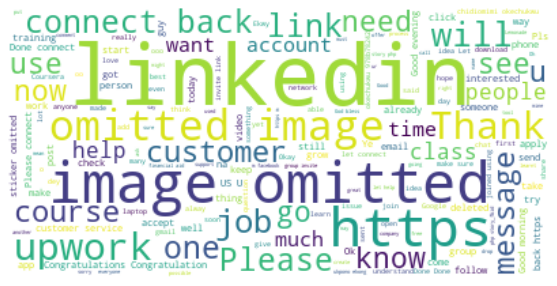

In [19]:
text = " ".join(text for text in df.messages_sent)

stopwords = set(STOPWORDS)
word_cloud = WordCloud(stopwords = stopwords, background_color = 'white').generate(text)
plt.figure(figsize = (10,5))
plt.imshow(word_cloud, interpolation ='bilinear')
plt.axis('off')
plt.savefig('most_word.png')
plt.show()

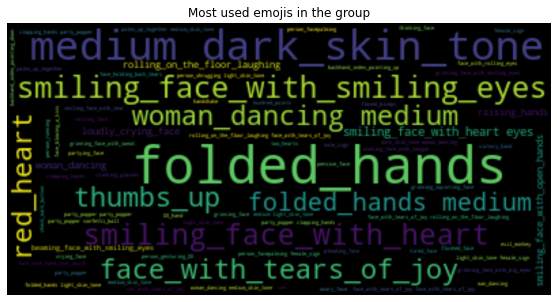

In [20]:
text = " ".join(text for text in df.types_of_emoji)

stopwords = set(STOPWORDS)
word_cloud = WordCloud(stopwords = stopwords, background_color = 'black').generate(text)
plt.figure(figsize = (10,5))
plt.imshow(word_cloud, interpolation ='gaussian')
plt.title('Most used emojis in the group')
plt.axis('off')
plt.savefig('Most_used_emoji.png')
plt.show()

In [30]:
emoji.emojize(":folded_hands:")

'🙏'

In [31]:
emoji.emojize(":smiling_face_with_smiling_eyes:")

'😊'

In [32]:
emoji.emojize(":medium_dark_skin_tone:")

':medium_dark_skin_tone:'

<AxesSubplot:xlabel='Authors'>

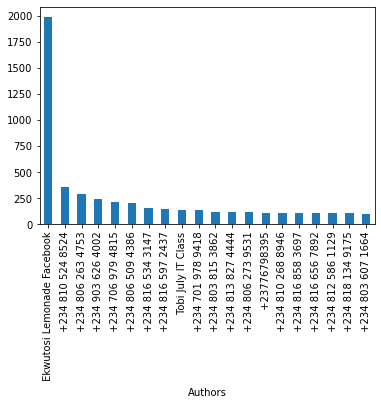

In [33]:
url_count = df.groupby('Authors', sort = False)['url_count'].sum().nlargest(20)

url_count.plot(kind= 'bar', )

In [34]:
#df['messages_sent'].str.contains("image omitted").sum()
#df['messages_sent'].str.contains("GIF omitted").sum()
df['messages_sent'].str.contains("video omitted").sum()
#df['messages_sent'].str.contains("audio omitted").sum()
#df['messages_sent'].str.contains("This message was deleted").sum()
#df['messages_sent'].str.contains("sticker omitted").sum()

35

In [35]:
mask = df['messages_sent'].str.contains(r'audio omitted|image omitted|video omitted|GIF omitted|sticker omitted', regex=True)

In [36]:
df['media_uploads'] = np.where(mask == True, 1, 0)

In [23]:
#df

In [38]:
df['media_uploads'].sum()

4095

In [24]:
#df.groupby('Authors')['media_uploads'].sum().nlargest(10)

In [40]:
df['deleted_messages'] = df['messages_sent'].str.contains("This message was deleted")

In [25]:
#df.head()
#df.groupby(by = 'Authors')['deleted_messages'].sum().nlargest(20)

In [82]:
df.to_csv('whatsApp.csv', index=  False)